# Example of using the TensorSpline API

This example demonstrates how to create a basic interpolation using the TensorSpline API.

In [1]:
#!/usr/bin/env python3
import numpy as np
import matplotlib.pyplot as plt
from splineops.interpolate.tensorspline import TensorSpline

## Data Preparation

Data type (need to provide floating numbers, "float64" and "float32" are typical)
Create random data samples and corresponding coordinates.

In [2]:
dtype = "float32"

nx, ny = 2, 5
xmin, xmax = -3.1, +1
ymin, ymax = 2, 6.5
xx = np.linspace(xmin, xmax, nx, dtype=dtype)
yy = np.linspace(ymin, ymax, ny, dtype=dtype)
coordinates = xx, yy
prng = np.random.default_rng(seed=5250)
data = prng.standard_normal(size=tuple(c.size for c in coordinates))
data = np.ascontiguousarray(data, dtype=dtype)

## Tensor Spline Setup

Tensor spline bases and signal extension modes.

In [3]:
bases = "bspline3"  # same basis applied to all dimensions
modes = "mirror"  # same mode applied to all dimensions

tensor_spline = TensorSpline(
    data=data, coordinates=coordinates, bases=bases, modes=modes
)

## Evaluation Coordinates

Create evaluation coordinates (extended and oversampled in this case).

In [4]:
dx = (xx[-1] - xx[0]) / (nx - 1)
dy = (yy[-1] - yy[0]) / (ny - 1)
pad_fct = 1.1
px = pad_fct * nx * dx
py = pad_fct * ny * dy
eval_xx = np.linspace(xx[0] - px, xx[-1] + px, 100 * nx)
eval_yy = np.linspace(yy[0] - py, yy[-1] + py, 100 * ny)

## Standard Evaluation

Perform a standard evaluation on a grid of coordinates.

In [5]:
eval_coords = eval_xx, eval_yy
data_eval = tensor_spline(coordinates=eval_coords)

## Meshgrid Evaluation

Evaluate using a meshgrid (not the default choice but could be useful in some cases).

In [6]:
eval_coords_mg = np.meshgrid(*eval_coords, indexing="ij")
data_eval_mg = tensor_spline(coordinates=eval_coords_mg, grid=False)
np.testing.assert_equal(data_eval, data_eval_mg)

## Points Evaluation

Evaluate the tensor spline at a list of points directly.

In [7]:
eval_coords_pts = np.reshape(eval_coords_mg, newshape=(2, -1))
data_eval_pts = tensor_spline(coordinates=eval_coords_pts, grid=False)
np.testing.assert_equal(data_eval, np.reshape(data_eval_pts, data_eval_mg.shape))

## Visualization

Visualize the original data samples and the interpolated data.

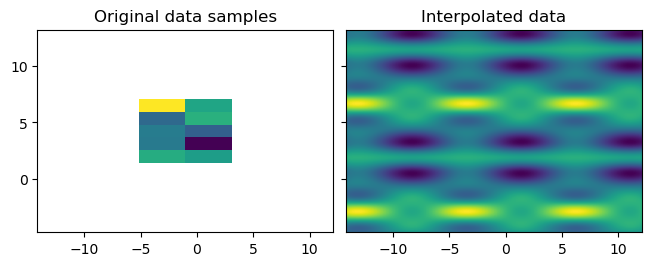

In [8]:
fig: plt.Figure
ax: plt.Axes

extent = [xx[0] - dx / 2, xx[-1] + dx / 2, yy[0] - dy / 2, yy[-1] + dy / 2]
eval_extent = [
    eval_xx[0] - dx / 2,
    eval_xx[-1] + dx / 2,
    eval_yy[0] - dy / 2,
    eval_yy[-1] + dy / 2,
]

fig, axes = plt.subplots(
    nrows=1, ncols=2, sharex="all", sharey="all", layout="constrained"
)
ax = axes[0]
ax.imshow(data.T, extent=extent)
ax.set_title("Original data samples")
ax = axes[1]
ax.imshow(data_eval.T, extent=eval_extent)
ax.set_title("Interpolated data")

plt.show()